In [45]:
import pandas as pd
import matplotlib
import seaborn
from scipy.stats import spearmanr

%matplotlib inline

In [46]:
seaborn.set_context('talk')

In [5]:
df = pd.read_table('../tables/baltic_transect_2014/pfam.tpm.annotated.tsv.gz', index_col=0)

In [33]:
metadata = pd.read_table('../tables/baltic_transect_2014/metadata.tsv')

In [34]:
metadata.index = metadata['Comment']

In [35]:
metadata['Sampling depth'] = metadata['Sampling depth'].apply(lambda x: float(x.replace(',','.')))
metadata['Chlorophyl a'] = metadata['Chlorophyl a'].apply(lambda x: float(x.replace(',','.')))

In [6]:
df.head()

,Name,Description,gene_length,P1994_101,P1994_102,P1994_103,P1994_104,P1994_105,P1994_106,P1994_107,...,P1994_121,P1994_122,P1994_123,P1994_124,P1994_125,P1994_126,P1994_127,P1994_128,P1994_129,P1994_130
Id,,,,,,,,,,,,,,,,,,,,,
PF00001,7tm_1,7 transmembrane receptor (rhodopsin family),34182.0,3.440987,0.640538,0.928267,0.947685,4.894383,0.199525,1.442258,...,0.109400,3.918317,7.260306,1.612254,2.964453,1.178973,0.226017,4.186873,0.870174,1.645502
PF00002,7tm_2,7 transmembrane receptor (Secretin family),52749.0,1.810402,0.997567,1.439873,0.057438,11.008512,0.591556,0.475876,...,0.196037,0.426863,4.424155,1.018173,0.537497,0.045149,0.182488,1.113413,2.937596,1.913825
PF00003,7tm_3,7 transmembrane sweet-taste receptor of 3 GCPR,31707.0,0.689034,0.202084,0.246900,0.208739,1.144695,0.242266,0.000000,...,0.096043,11.807240,2.364844,0.229981,2.866922,0.406401,0.070511,5.710859,0.508079,0.545479
PF00004,AAA,ATPase family associated with various cellular...,17085501.0,2320.376120,2330.122836,2079.657622,2472.401036,1591.904399,2236.009949,2013.628212,...,2175.841398,1840.651380,1733.275980,2357.844017,2095.198714,1958.582518,1900.643008,2019.200065,2102.904795,2075.168379
PF00005,ABC_tran,ABC transporter,59055276.0,11703.788056,13575.412339,12662.414299,14914.973447,10807.392743,12938.791200,13698.497251,...,12221.094788,6551.833431,14430.468508,11530.830502,9073.107658,13793.084185,10648.492733,7125.428838,13241.437884,13013.930499


In [7]:
photo = ['PF00124', 'PF14870', 'PF02276', 'PF03967']

In [9]:
df.loc[photo]

,Name,Description,gene_length,P1994_101,P1994_102,P1994_103,P1994_104,P1994_105,P1994_106,P1994_107,...,P1994_121,P1994_122,P1994_123,P1994_124,P1994_125,P1994_126,P1994_127,P1994_128,P1994_129,P1994_130
Id,,,,,,,,,,,,,,,,,,,,,
PF00124,Photo_RC,Photosynthetic reaction centre protein,245895.0,202.705690,18.882508,14.686971,198.327121,34.815659,4.052315,183.069577,...,17.453869,248.010379,22.811963,3.992152,184.465753,96.187021,49.841930,168.703358,10.589687,14.728024
PF14870,PSII_BNR,Photosynthesis system II assembly factor YCF48,618186.0,33.674722,77.869151,86.049134,38.706464,52.591235,116.342320,22.451094,...,65.513431,36.069011,40.297246,211.597311,46.475814,32.925561,26.131923,36.013893,67.706034,67.356451
PF02276,CytoC_RC,Photosynthetic reaction centre cytochrome C su...,77241.0,25.269152,9.101002,10.173026,4.273300,1.045052,16.336403,65.526519,...,3.529012,8.539461,2.855971,18.293966,4.155976,6.471694,8.961148,8.367286,9.086458,9.167910
PF03967,PRCH,"Photosynthetic reaction centre, H-chain N-term...",32178.0,55.025595,4.391605,4.710917,7.165483,2.159015,0.143210,52.991069,...,0.580823,8.662005,2.503637,0.225091,2.306661,2.381332,1.702763,14.433862,1.191315,0.853129


In [21]:
val_cols = list(df.columns)
val_cols.remove('Description')
val_cols.remove('gene_length')
val_cols.remove('Name')

In [25]:
plot_df = df[val_cols].loc[photo].T

In [36]:
plot_df['Depth'] = metadata['Sampling depth']
plot_df['Chlorophyl a'] = metadata['Chlorophyl a']

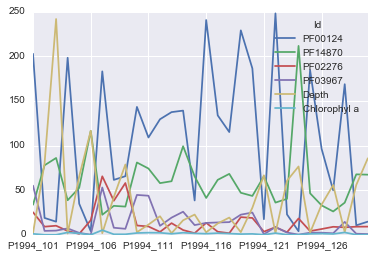

In [37]:
plot_df.plot()

In [43]:
corr_df = df[val_cols].T
corr_df['Depth'] = metadata['Sampling depth']

In [51]:
spearman_results = {}
for col in corr_df.columns:
    if col != 'Depth':
        spearman_results[col] = spearmanr(corr_df[col], corr_df['Depth'])

/Users/johannesalneberg/anaconda/envs/BARM_analysis/lib/python3.5/site-packages/numpy/lib/function_base.py:2558: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/johannesalneberg/anaconda/envs/BARM_analysis/lib/python3.5/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/johannesalneberg/anaconda/envs/BARM_analysis/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/Users/johannesalneberg/anaconda/envs/BARM_analysis/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in less
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/Users/johannesalneberg/anaconda/envs/BARM_analysis/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1749: RuntimeWarning: invalid value encounte

In [53]:
spearman_results['PF00001']

SpearmanrResult(correlation=-0.34949944382647385, pvalue=0.058339174840472033)

In [57]:
corr_res_df = pd.DataFrame.from_dict(spearman_results, orient='index')

In [59]:
corr_res_df.loc['PF00124']

correlation   -8.731924e-01
pvalue         3.084280e-10
Name: PF00124, dtype: float64

In [58]:
corr_res_df.sort_values('pvalue')

,correlation,pvalue
PF02338,-0.892770,3.341489e-11
PF01855,0.891880,3.730167e-11
PF02812,0.891435,3.939736e-11
PF04463,0.887430,6.376870e-11
PF11360,-0.876752,2.118193e-10
PF13401,0.873637,2.944583e-10
PF00124,-0.873192,3.084280e-10
PF07109,-0.873192,3.084280e-10
PF17177,-0.868743,4.857439e-10
PF03190,0.867853,5.308857e-10


In [31]:
metadata.columns

Index(['Nr', 'Institution', 'Study', 'Responsible researcher', 'Sample title',
       'Size fraction', 'Fixative', 'Latitude', 'Longitude', 'Sampling depth',
       'Geolocation', 'Sampling basin', 'Sampling station',
       'Environmental material', 'Environmental biome',
       'Environmental feature', 'Organism', 'Collection date',
       'Collection time', 'Sequencing Facility (Library prep)', 'Library type',
       'Internal standard', 'Molecule', 'Salinity', 'Temperature', 'Turbidity',
       'pH', 'NO3-', 'NO2-', 'PO42-', 'O2', 'H2S', 'NH4+', 'SiO2-',
       'Chlorophyl a', 'DON', 'DOC', 'Leucin incorporation',
       'Thymidin incorporation', 'Bacterial count', 'Comment'],
      dtype='object')

Comment
P1994_116    1,22
P1994_117    1,86
P1994_118    1,37
P1994_101    1,08
P1994_102    0,02
P1994_103    0,02
P1994_110    2,01
P1994_111    2,38
P1994_112    2,26
P1994_113    1,13
P1994_114    2,33
P1994_115    1,61
P1994_119    0,81
P1994_120    1,03
P1994_121    0,11
P1994_104    2,63
P1994_105    1,56
P1994_106       0
P1994_125    1,07
P1994_126    1,33
P1994_127    0,98
P1994_107    5,22
P1994_108    0,57
P1994_109    0,59
P1994_122    1,89
P1994_123    0,07
P1994_124    0,11
P1994_128    2,63
P1994_129    0,07
P1994_130    0,21
Name: Chlorophyl a, dtype: object